<a href="https://colab.research.google.com/github/seremmartin64-ops/ML/blob/main/concrete%20crack%20for%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"seremmartin","key":"5e6bc345f938a1b5df76596d07e957df"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d arnavr10880/concrete-crack-images-for-classification
!unzip -o concrete-crack-images-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Positive/15001_1.jpg    
  inflating: Positive/15002_1.jpg    
  inflating: Positive/15003_1.jpg    
  inflating: Positive/15004_1.jpg    
  inflating: Positive/15005_1.jpg    
  inflating: Positive/15006_1.jpg    
  inflating: Positive/15007_1.jpg    
  inflating: Positive/15008_1.jpg    
  inflating: Positive/15009_1.jpg    
  inflating: Positive/15010_1.jpg    
  inflating: Positive/15011_1.jpg    
  inflating: Positive/15012_1.jpg    
  inflating: Positive/15013_1.jpg    
  inflating: Positive/15014_1.jpg    
  inflating: Positive/15015_1.jpg    
  inflating: Positive/15016_1.jpg    
  inflating: Positive/15017_1.jpg    
  inflating: Positive/15018_1.jpg    
  inflating: Positive/15019_1.jpg    
  inflating: Positive/15020_1.jpg    
  inflating: Positive/15021_1.jpg    
  inflating: Positive/15022_1.jpg    
  inflating: Positive/15023_1.jpg    
  inflating: Positive/15024_1.jpg    
  inflating: Positive/15025_1.jpg    

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [7]:
dataset_dir = '/content/'

In [8]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 # Added validation split
)

In [9]:
train_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 32000 images belonging to 4 classes.


In [10]:
validation_generator = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 8000 images belonging to 4 classes.


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,604 (756.27 KB)

 Trainable params: 193,604 (756.27 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=100,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 160s 154ms/step - accuracy: 0.9222 - loss: 0.1960 - val_accuracy: 0.9925 - val_loss: 0.0342
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 153s 153ms/step - accuracy: 0.9753 - loss: 0.0839 - val_accuracy: 0.9900 - val_loss: 0.0302
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 153s 152ms/step - accuracy: 0.9824 - loss: 0.0635 - val_accuracy: 0.9928 - val_loss: 0.0205
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 153s 153ms/step - accuracy: 0.9836 - loss: 0.0569 - val_accuracy: 0.9584 - val_loss: 0.1070
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 152s 152ms/step - accuracy: 0.9823 - loss: 0.0577 - val_accuracy: 0.9781 - val_loss: 0.1413
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 151s 151ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.9925 - val_loss: 0.0712
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 153s 152ms/step - accuracy: 0.9915 - loss: 0.0293 - val_accuracy: 0.9919 - val_loss: 0.0283
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 201s 151ms/step - ac

In [13]:
scores = model.evaluate(validation_generator)
print(f"\nTest Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]*100:.2f}%")



250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 129ms/step - accuracy: 0.9977 - loss: 0.0104

Test Loss: 0.0115
Test Accuracy: 99.77%


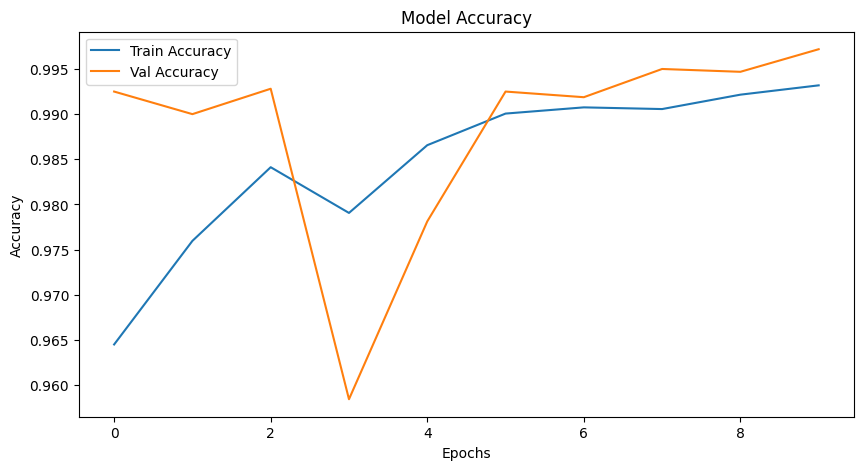

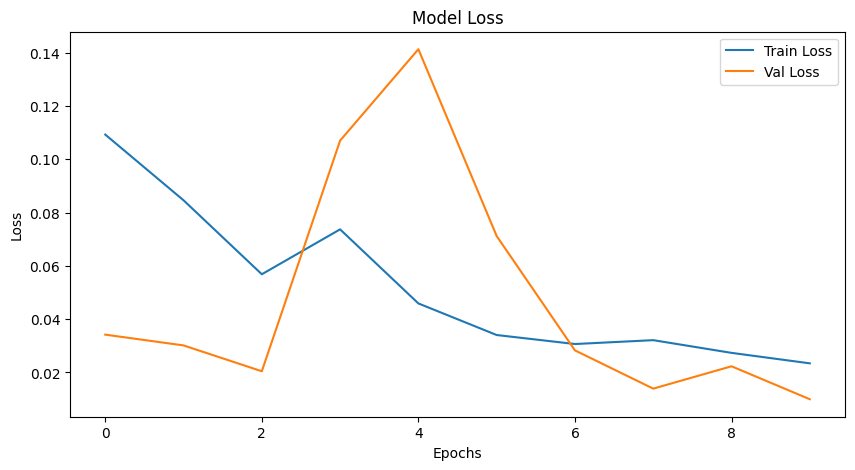

In [14]:
# Accuracy Plot
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


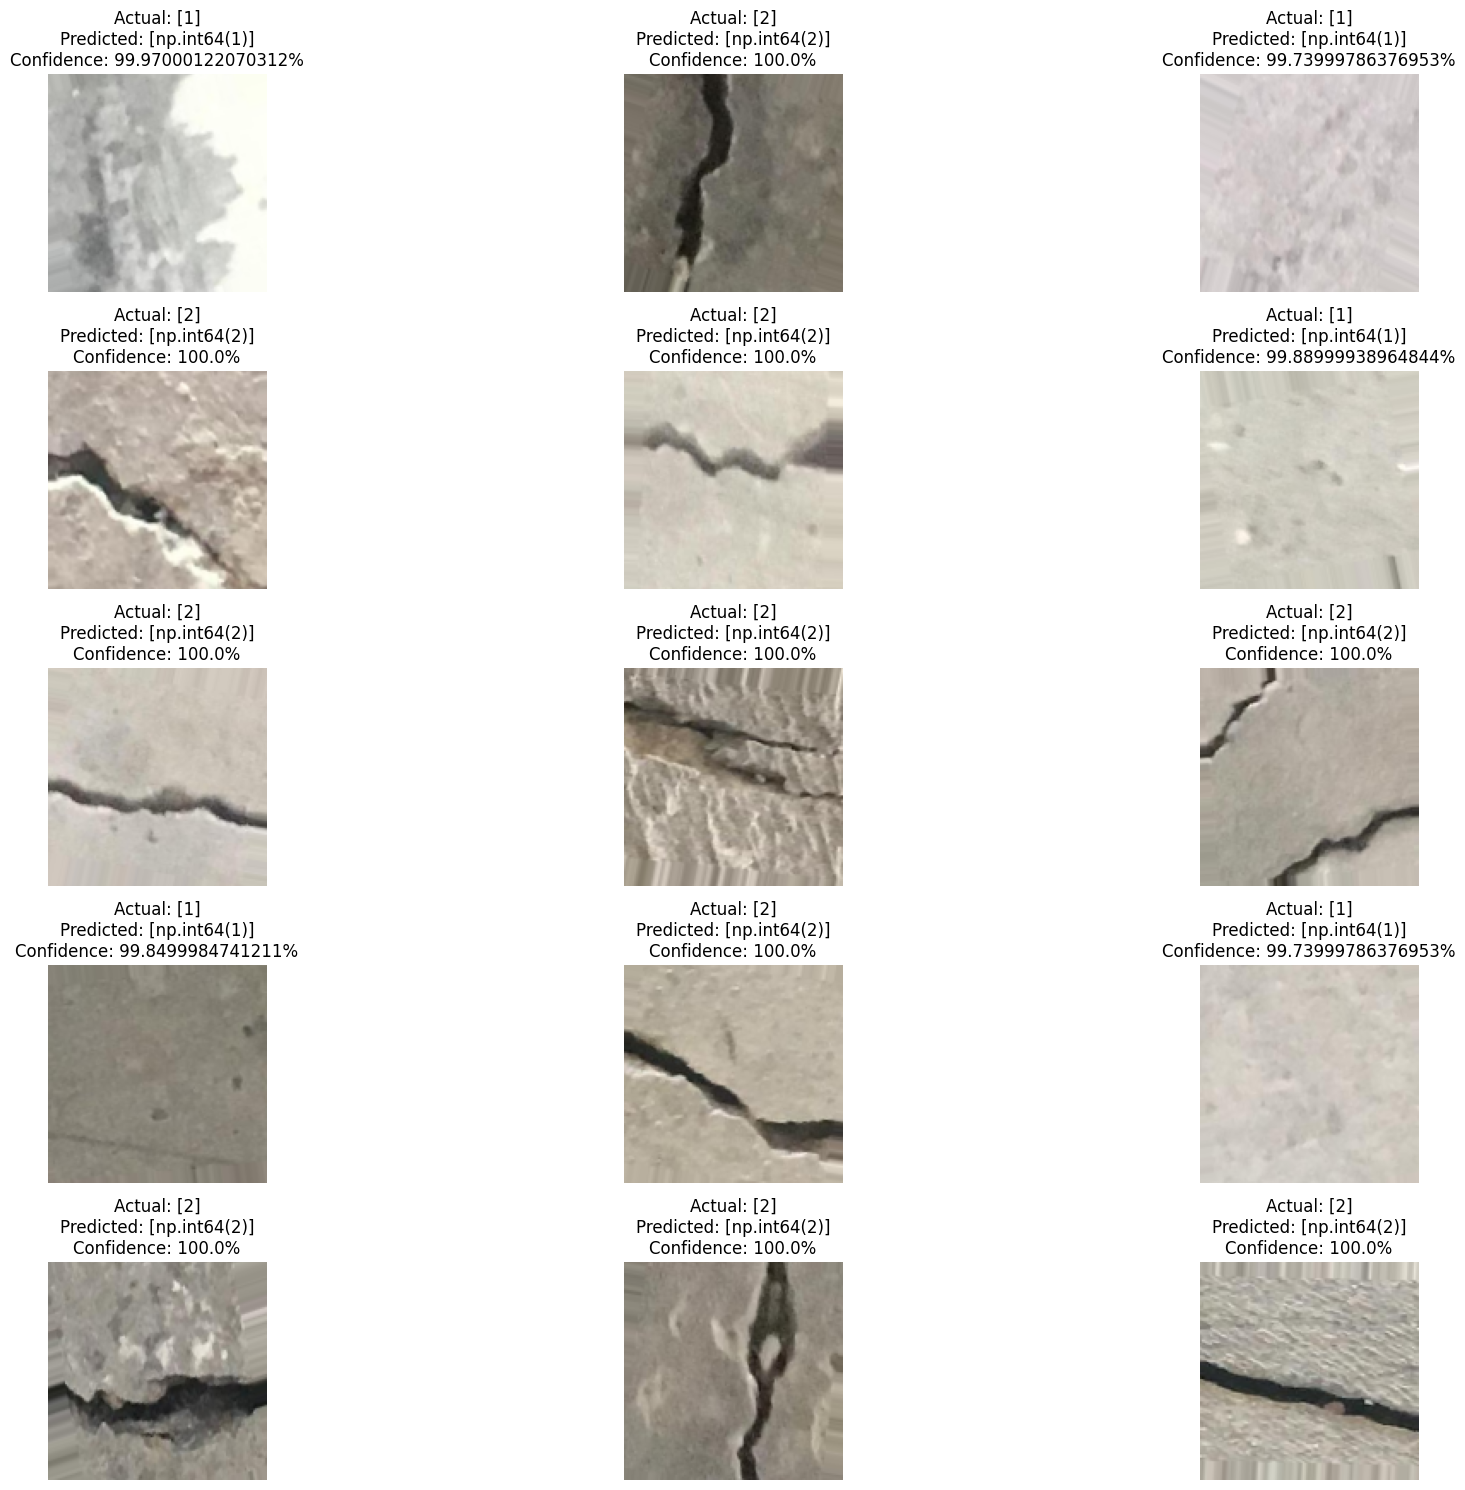

In [15]:
# make prediction
x_batch, y_batch = next(validation_generator)

plt.figure(figsize=(20, 15))
for i in range(15):
    ax = plt.subplot(5, 3, i + 1)
    img = x_batch[i]

    # Get actual label
    actual_idx = int(np.argmax(y_batch[i]))
    actual_label = [actual_idx]

    # Get prediction
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array, verbose=0)[0]
    predicted_label = [np.argmax(predictions)]
    confidence = round(100 * np.max(predictions), 2)

    plt.imshow(img)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nConfidence: {confidence}%")
    plt.axis("off")

plt.tight_layout()
plt.show()

